## code to download images

In [2]:
import os
import pip._vendor.requests as requests
from typing import List
import json

class PokemonCardData:

    def __init__(self, id, name, image_url):
        self.id = id
        self.name = name
        self.image_url = image_url

def download_image(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Image successfully downloaded: {file_path}")
    else:
        print(f"Failed to retrieve image. Status code: {response.status_code}")

def read_json_array(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        return data
    
def extract_values(json_array):
    card_array = []
    for item in json_array:
        id = item.get('id')
        name = item.get('name')
        image_url = item.get('images', {}).get('small')
        rarity = item.get('rarity')

        if rarity is not None:
            if 'rare' in rarity.lower():
                card = PokemonCardData(id, name, image_url)
                card_array.append(card)
    
    return card_array

def download_cards(card_array : List[PokemonCardData], folder_path):
    for card in card_array:
        file_path = os.path.join(folder_path, card.id + '.png')
        download_image(card.image_url, file_path)

In [3]:
def download_all_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            data = read_json_array(file_path)
            card_array = extract_values(data)
            download_cards(card_array, 'pokemon-tcg-images')


In [4]:
# download_all_images('pokemon-tcg-data/cards/en')

In [5]:
def count_files_in_folder(folder_path):
    # Ensure the path is a directory
    if not os.path.isdir(folder_path):
        return 0
    
    # Count the number of files
    num_files = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    
    return num_files

In [15]:
print(count_files_in_folder('pokemon-tcg-images/'))

7437


In [2]:
import shutil

def organize_images(directory):
    # Ensure the provided directory exists
    if not os.path.isdir(directory):
        print(f"The directory {directory} does not exist.")
        return

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if the file is an image (you can extend the list of extensions as needed)
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp')):
            # Create a new directory for the image
            image_name = os.path.splitext(filename)[0]
            new_directory = os.path.join(directory, image_name)
            
            # Ensure the new directory does not already exist
            if not os.path.exists(new_directory):
                os.makedirs(new_directory)
            
            # Move the image into the new directory
            new_path = os.path.join(new_directory, filename)
            shutil.move(file_path, new_path)
            print(f"Moved {filename} to {new_directory}")

In [4]:
# organize_images('pokemon-tcg-images')

Moved hgss4-93.png to pokemon-tcg-images/hgss4-93
Moved sv3-124.png to pokemon-tcg-images/sv3-124
Moved swsh4-98.png to pokemon-tcg-images/swsh4-98
Moved sv4-242.png to pokemon-tcg-images/sv4-242
Moved dp4-30.png to pokemon-tcg-images/dp4-30
Moved swsh12pt5-100.png to pokemon-tcg-images/swsh12pt5-100
Moved sm5-93.png to pokemon-tcg-images/sm5-93
Moved sm3-164.png to pokemon-tcg-images/sm3-164
Moved ex10-114.png to pokemon-tcg-images/ex10-114
Moved swsh3-77.png to pokemon-tcg-images/swsh3-77
Moved sm1-139.png to pokemon-tcg-images/sm1-139
Moved xy1-1.png to pokemon-tcg-images/xy1-1
Moved sv4pt5-92.png to pokemon-tcg-images/sv4pt5-92
Moved col1-39.png to pokemon-tcg-images/col1-39
Moved sma-SV38.png to pokemon-tcg-images/sma-SV38
Moved sm7-65.png to pokemon-tcg-images/sm7-65
Moved sv4-100.png to pokemon-tcg-images/sv4-100
Moved ex6-107.png to pokemon-tcg-images/ex6-107
Moved bw3-12.png to pokemon-tcg-images/bw3-12
Moved ecard2-1.png to pokemon-tcg-images/ecard2-1
Moved swsh10-13.png to p

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from cardextractor import CardExtractor

ce = CardExtractor()

template_img = cv2.imread('pokemoncardtemplate.png', cv2.IMREAD_GRAYSCALE)
canny = cv2.Canny(template_img, 0, 150)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

template_contour = max(contours, key=cv2.contourArea)  



# template_img = cv2.drawContours(blank_image, contours, -1, [255, 255, 255], 4)

# template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB) 
# plt.imshow(template_img)
# plt.show()




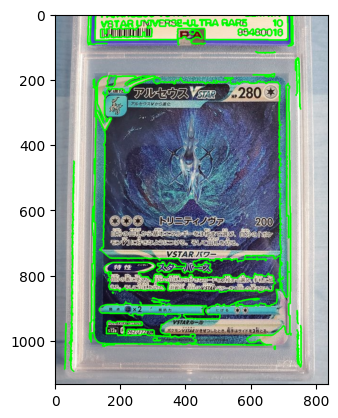

In [55]:
actual_image = cv2.imread('pokemon-real-test-images/test-arceus-vstar-psa.png')
blank_image = np.zeros_like(actual_image)
sift = cv2.SIFT_create()

edges = ce.preprocess_image(actual_image)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

most_similar_contour = None
max_ratio = 0

for contour in contours:
    similarity_ratio = cv2.matchShapes(contour, template_contour, 1, 0.0)

    if similarity_ratio > max_ratio:
        max_ratio = similarity_ratio
        most_similar_contour = contour



actual_image = cv2.drawContours(actual_image, contours, -1, [0, 255, 0], 4)

plt.imshow(actual_image)
plt.show()




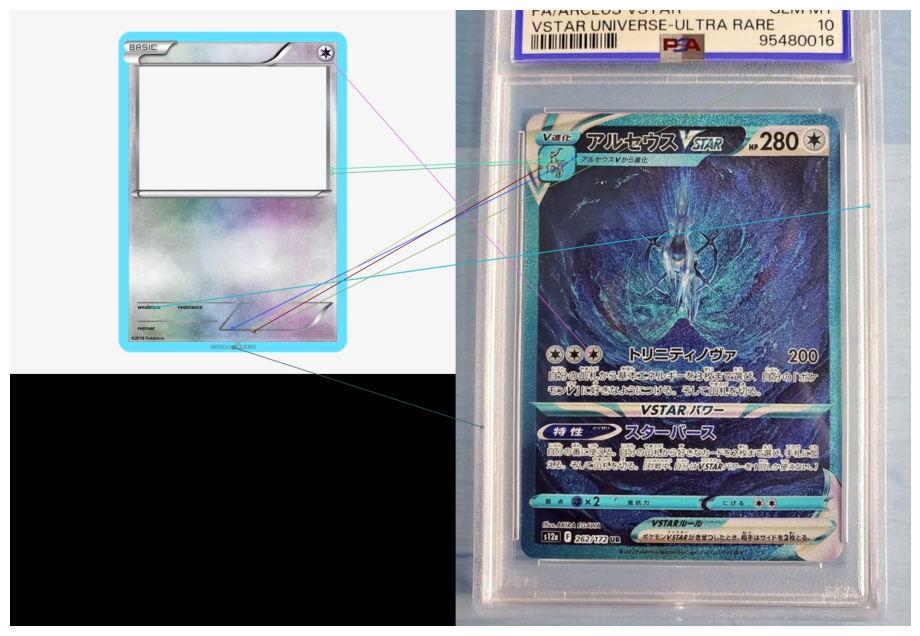

In [53]:
sift = cv2.SIFT_create()

keypoints_ref, descriptors_ref = sift.detectAndCompute(template_img, None)
keypoints_act, descriptors_act = sift.detectAndCompute(actual_image, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_ref, descriptors_act)

# Sort the matches based on distance (quality of match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the top 50 matches
matched_image = cv2.drawMatches(template_img, keypoints_ref, actual_image, keypoints_act, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.figure(figsize=(12, 8))
plt.imshow(matched_image)
plt.axis('off')
plt.show()

